In [1]:
# ============================================================
# Task 1 — Data Exploration and Insights (IMDB Reviews)
# ============================================================

# If you run into missing packages, uncomment and run:
# !pip -q install pandas numpy matplotlib scikit-learn wordcloud nltk

import os
import re
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.grid"] = True


In [2]:
# -----------------------------
# 1) Load the dataset
# -----------------------------
DATA_PATH = "imdb.csv"  # <-- change if needed

assert os.path.exists(DATA_PATH), f"File not found: {DATA_PATH}. Put the CSV next to the notebook or update DATA_PATH."

df = pd.read_csv(DATA_PATH)
df.head()


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


,count,percent
sentiment,,
positive,25000,50.0
negative,25000,50.0


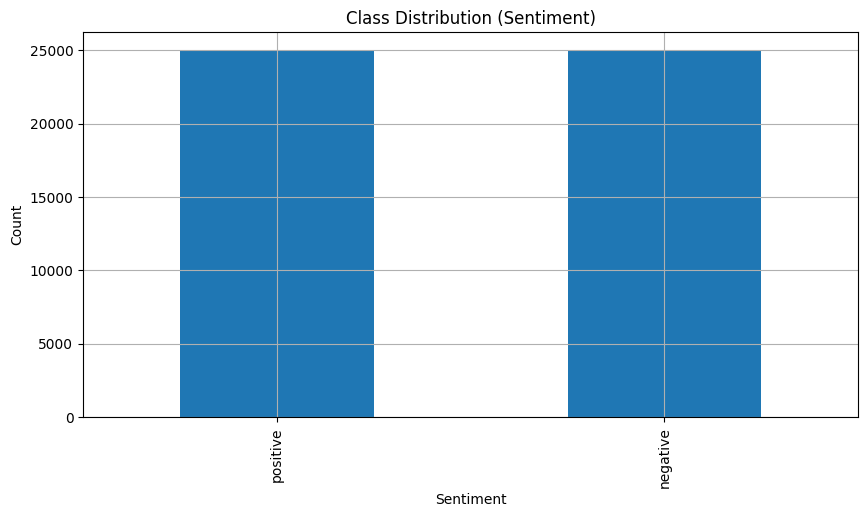

In [3]:
# -----------------------------
# 2) Class distribution
# -----------------------------
class_counts = df["sentiment"].value_counts()
class_perc = (class_counts / len(df) * 100).round(2)

display(pd.DataFrame({"count": class_counts, "percent": class_perc}))

ax = class_counts.plot(kind="bar")
ax.set_title("Class Distribution (Sentiment)")
ax.set_xlabel("Sentiment")
ax.set_ylabel("Count")
plt.show()


In [4]:
# -----------------------------
# 3) Text length analysis
#    - characters
#    - words (simple tokenization)
# -----------------------------

# A light tokenizer for Task 1 (not your final preprocessing)
TOKEN_RE = re.compile(r"[A-Za-z]+(?:'[A-Za-z]+)?")  # keeps words and contractions

def simple_word_count(text: str) -> int:
    return len(TOKEN_RE.findall(text))

df["char_len"] = df["review"].str.len()
df["word_len"] = df["review"].apply(simple_word_count)

# Overall stats
overall_stats = df[["char_len", "word_len"]].describe(percentiles=[0.25, 0.5, 0.75]).T
overall_stats[["mean", "50%", "min", "max"]] = overall_stats[["mean", "50%", "min", "max"]].round(2)
overall_stats


,count,mean,std,min,25%,50%,75%,max
char_len,50000.0,1309.43,989.728014,32.0,699.0,970.0,1590.25,13704.0
word_len,50000.0,233.75,173.228423,6.0,127.0,175.0,284.00,2482.0
